<a id='title'></a>
<div style='background-color: rgba(0, 100, 200, .1)'>
<b><i><h1 style='text-align:center ; padding-top:5px'>
    RepoLingo
</h1></i></b>
<i><h5 style='text-align:center ; padding-bottom:5px'>
    Do You Read Me?
</h5></i></div>
    <li><a href='#imports'>Imports</a>
    <li><a href='#acquire'>Acquire</a>
    <li><a href='#prepare'>Prepare</a>
    <li><a href='#explore'>Explore</a>
    <li><a href='#model'>Modeling</a>
    <li><a href='#conclusion'>Conclusion</a>
    </li>

## Overview

Utilizing Web-Scraping techniques on Github NLP repository's README that have the majority of the code as Python or HTML, create a classification model that accurately predicts the predominant coding language used within each repository.  This is important to see if there is any pattern of vocabulary usage that tends to dictate the predominant coding language.

---

<a id='imports'></a>
<b><i><h1 style='background-color: rgba(0, 100, 200, .1) ; text-align:center ; padding-top:5px ; padding-bottom:5px'>
    Imports
</h1></i></b>
    <li><a href='#title'>Back to Top</a></li>

| Python Library | Version | Usage |
| ----- | ----- | ----- |
| numpy | 1.21.5 | Vectorization |
| pandas | 1.4.4 | Dataframing |
| matplotlib | 3.5.2 | Visualization |
| seaborn | 0.11.2 | Visualization |
| wordcloud | 1.9.1.1 | Visualization |
| bs4 | 4.11.1 | NLP |
| requests | 2.28.1 | NLP |
| regex | 2022.7.9 | NLP |
| nltk | 3.7 | NLP |
| unicodedata | X | NLP |
| sklearn | 1.0.2 | Stats, Metrics, Modeling |

In [1]:
# Import to maintain cleanliness of file
import final as f
import modeling as m
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

---

<a id='acquire'></a>
<b><i><h1 style='background-color: rgba(0, 100, 200, .1) ; text-align:center ; padding-top:5px ; padding-bottom:5px'>
    Acquire
</h1></i></b>
    <li><a href='#title'>Back to Top</a></li>
    
Requirements from grading rubric (WRANGLE):
- Called wrangle functions
- Markdown explaining preparation and why 
- Explain handling missing values
- Split into train, validate, test

<b>Data Description:</b>
- Web-scraped data from 500 NLP related Github repositories that contain the README contents and predominant code language (Python or HTML) for each repository.  The target variable is the predominant coding language of each repository (Python or HTML).

<b>Data Dictionary:</b>

| Feature Name | Data Type | Description | Example |
| ----- | ----- | ----- | ----- |
| repo | object | Name of Repository | 'huggingface/transformers' |
| language | object | Predominant coding language of Repository | 'Python' |
| readme_contents | object | Contents of Repository's README file | 'Transformers provides thousands of pretrained...' |
| cleaned_readme_contents | object | Cleaned version  of contents of Repository's README file | 'transformers provides thousands pretrained...' |

In [2]:
# Using the final.py file...
# Get the shape of the vanilla dataframe
raw_data = f.vanilla()
raw_data.shape

(500, 4)

<b>Vanilla Data Shape:</b>

- Columns: 4
- Rows: 500

---

<a id='prepare'></a>
<b><i><h1 style='background-color: rgba(0, 100, 200, .1) ; text-align:center ; padding-top:5px ; padding-bottom:5px'>
    Prepare
</h1></i></b>
    <li><a href='#title'>Back to Top</a></li>

Requirements from grading rubric (WRANGLE):
- Called wrangle functions
- Markdown explaining preparation and why 
- Explain handling missing values
- Split into train, validate, test

<b>Missing Value Handling:</b>

Nothing of significance.

<b>NLP Methodology</b>

1. Clean text of contents
2. Tokenize cleaned text
3. Lemmatize tokenized data
4. Remove stop-words (To include predominant coding language) of lemmatized data

---

<b>Post-Explore Preparation</b>

1. Removed 1 outlier repository
2. Changed all srchttps strings to srchttp_link
3. Removed all '&#9;'

In [3]:
# Using the final.py file...
# Get the shape of the prepared dataframe
prepped_df = f.prepare()
prepped_df.shape

(499, 4)

<b>Prepared Data Shape:</b>

- Columns: 4
- Rows: 499

#### We found there was one repository containing over 2000 hyperlinks. Below is a visual of repos containing hyperlinks before and after removing this outlier repo.

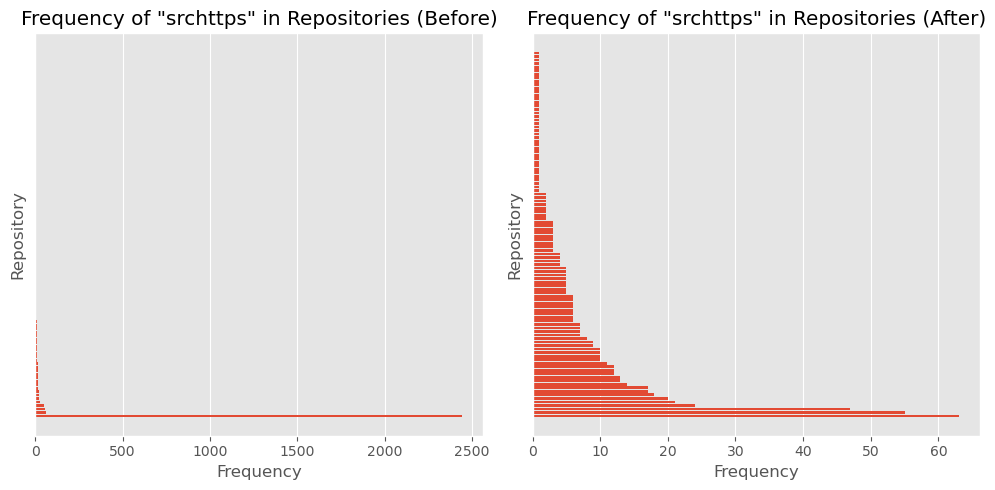

In [4]:
# Using the final.py file...
# Demostrate the outlier repository to reinforce it's removal
# Show the visual of the distribution of 'srchttps' before and after for all repositories
f.visual1(raw_data, prepped_df)

#### Train, validate test split
We split our data in order to prevent overfitting with:
- 70% training
- 20% validate
- 10% test

In [5]:
train, validate, test = f.train_split(prepped_df)

---

<a id='explore'></a>
<b><i><h1 style='background-color: rgba(0, 100, 200, .1) ; text-align:center ; padding-top:5px ; padding-bottom:5px'>
    Explore
</h1></i></b>
    <li><a href='#title'>Back to Top</a></li>

Requirements from grading rubric:
- 4 Questions w/ clear answer
- 5 visuals (If statistics shown, must relate to visual)
- 1 accurate statistical test
- Summary (Takeaways, features for modeling w/ explanation)

---

### <b> Question 1: </b> 
Is there unique terminology used for Python and HTML?

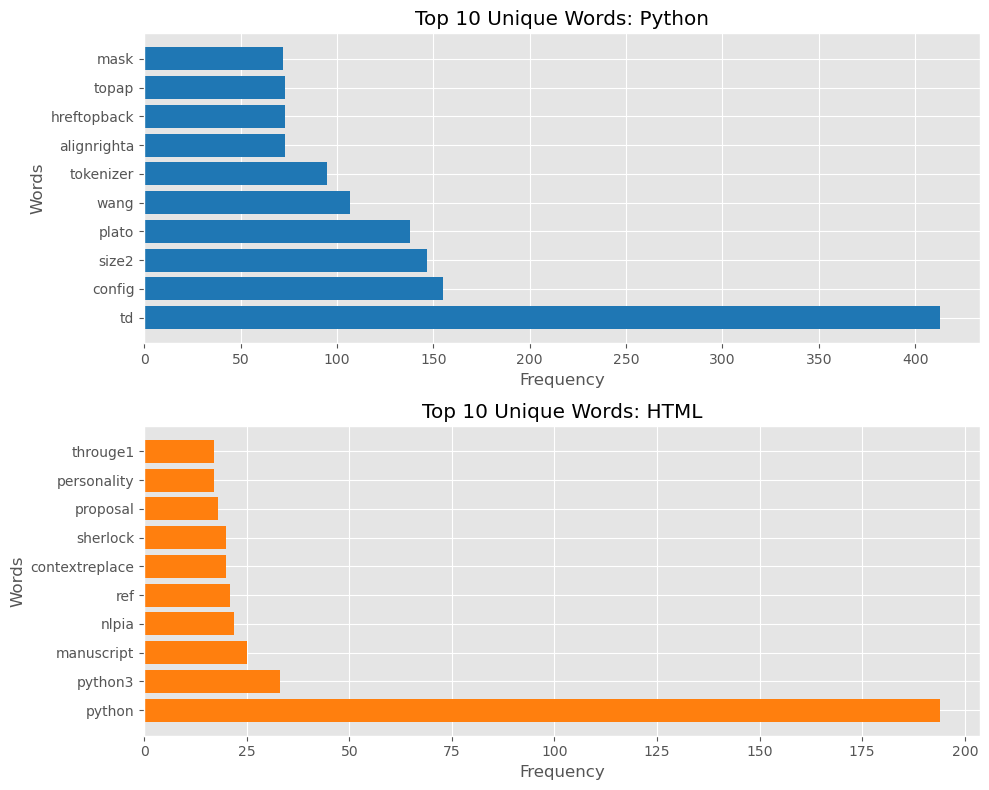

In [6]:
# Using the final.py file...
# Demonstrate top unique words for each repository group
# Get the distribution of unique words for both Python and HTML repositories
f.visual2(train)

### <b> Answer to Question 1: </b> 
As demonstrated above, there does appear to be a plethora of unique words specific to each repository coding language.

#### <b> Takeaway: </b> 
Python and HTML Github NLP repositories have unique words used in each coding group.

---

## <b> Question 2: </b> 
Are there words that are used more in Python than HTML and vice versa?

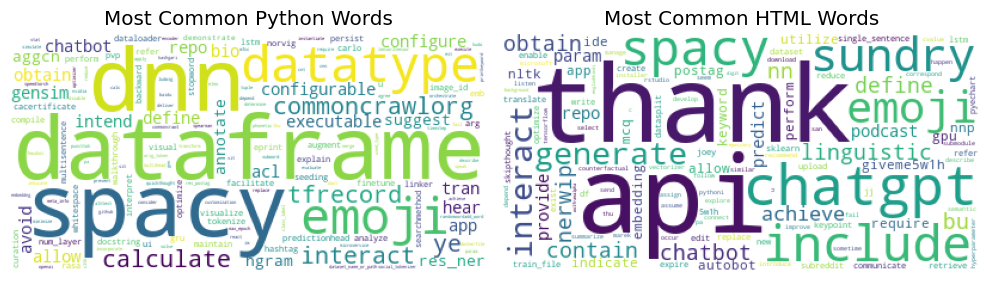

In [7]:
# Using the final.py file...
# Show the most commonly used words across repositories
# via wordclouds of both Python and HTML repositories
f.visual3(train)

### <b> Answer to Question 2: </b> 
Demonstrated above are the most frequent words used across each group of repositories (Python or HTML) and for the most part appear to be unique as well.

### <b> Takeaway: </b> 
Python and HTML have words that are used frequently across repositories as well as being unique to the repository coding group.

---

## <b> Question 3: </b> 
Are there 2-word combinations that are used more in Python than HTML and vice versa?

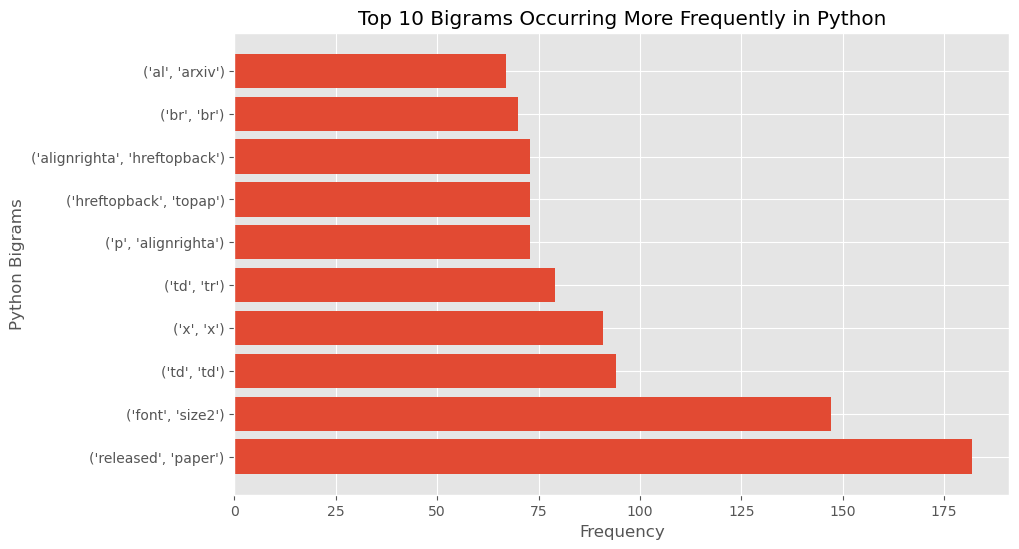

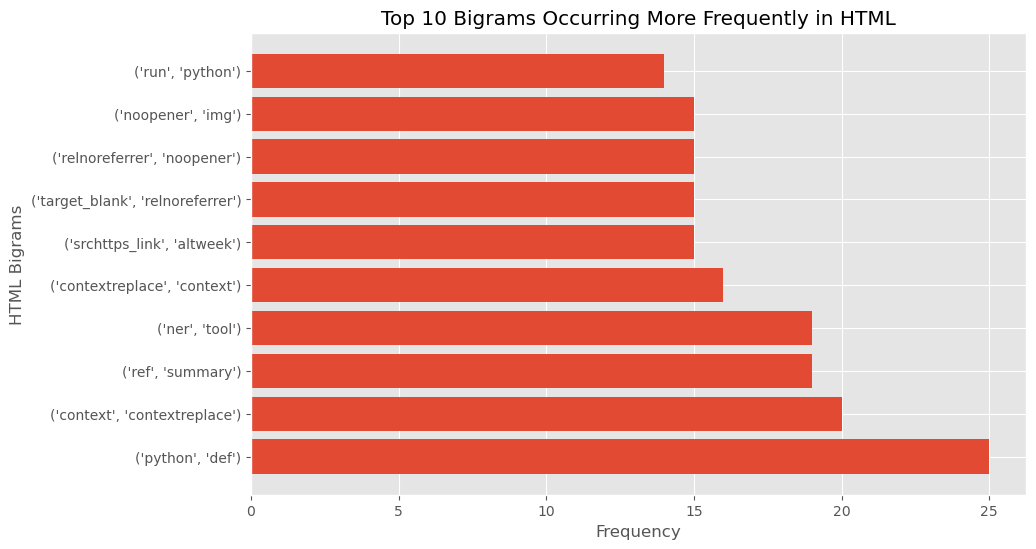

In [8]:
# Using the final.py file...
# Demonstrate bigrams (2-word combinations) that occur the most in each group
# Get the distribution of bigrams for both Python and HTML
f.visual4(train)

### <b> Answer to Question 3: </b> 
As demonstrated above, it appears that not only single words, but combinations of 2-words, or bigrams, appear to be unique as well as being the most frequent for both Python and HTML repositories.

#### <b> Takeaway: </b> 
Whether it's 1-word or 2-word combinations, the most frequent words for either Python or HTML also appear to be unique to those respective repository coding language group.

---

## <b> Question 4: </b> 
Do hyperlinks (text begining with 'http') occur more in Python or in HTML readmes?

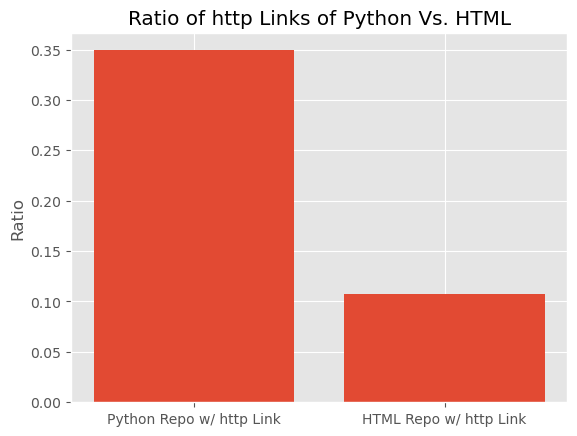

In [9]:
# Using the final.py file...
# Demonstrate the ratio of Python repositories with at least one http word
# divided by all Python repositories and do the same with the HTML group
# Show the distribution of repositories with http words for each language
f.visual5(train)

### <b> Is this result statistically valid?</b> 
- <b>H$_0$:</b> HTTP words occur equally across both Python and HTML repositories.
- <b>H$_a$:</b> HTTP words <b>DO NOT</b> occur equally across both Python and HTML repositories.
- We will be using a chi-squared test
- α = 0.05

In [11]:
# Using the final.py file...
# Demonstrate whether or not http words are statistically significant
# Get the chi2_contingency stat test of http words vs. language
f.stat1(train)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00000064


#### We are able to reject the null hypothesis

### <b> Answer to Question 4: </b> 
Hyperlinks occur more in Python repositories than HTML repositories.

#### <b> Takeaway: </b> 
Repositories written in predominantly Python tend to have hyperlinks (words begining with http) almost 25% more than that repositories written in HTML.

---

## <b> Exploration Summary</b> 

#### <b>Takeaway:</b>  
Overall there does appear to be unique words as well as being the most frequent for both Python and HTML repositories.  It also may appear that Python repositories tends to have a higher frequency of http links and references as opposed to HTML repositories

#### <b>Features For Modeling:</b> 
After removal of the outlier repository as to prevent skewing the training data as well as normalizing all http links and removal of abstract characters, we will continue with the remaining contents of the repositories for training.

---

<a id='model'></a>
<b><i><h1 style='background-color: rgba(0, 100, 200, .1) ; text-align:center ; padding-top:5px ; padding-bottom:5px'>
    Modeling
</h1></i></b>
    <li><a href='#title'>Back to Top</a></li>

Requirements from grading rubric:
- Identify and explain model evaluation metric
- Baseline creation
- All models used on train and validate
- ONLY top model on test
- At least 3 unique models

### Model Evaluation Metric
- Metric: <b><mark>Accuracy</mark></b>
- Since we do not necessarily care for specifically Python or HTML predictions, but rather the overall accuracy of the model, we will evaluate models on their accuracy scores

### Baseline
- The baseline represents the mode (Most Occurring data) which is Python repositories at 60% accuracy for the training set

In [ ]:
# Using the final.py file...
# Demonstrate the baseline model
m.get_model_baseline(train, validate)

---

### Models
- 96 models were ran...
- decistion_tree-tfidf_1gram_4depth is our best model with 
    - training-accuracy: 0.899713	
    - validation-accuracy: 0.91	
    - accuracy difference: 0.010287

In [ ]:
X_train = train.cleaned_readme_contents
y_train = train.language
X_validate = validate.cleaned_readme_contents
y_validate = validate.language
X_test = test.cleaned_readme_contents
y_test = test.language

In [ ]:
m.get_model_tree_tfidf_1gram_4depth(X_train, X_validate, y_train, y_validate)

In [ ]:
# Using the final.py file...
# Show the top 15 out of 96 models
# Demonstrate a sample of models created and their scores
f.models()

---

### Best Model

In [ ]:
# Using the final.py file...
# Demonstrate the performance of the best model
f.topmodel()

---

### Modeling Wrap 
* Give a final interpretation of how the models test score compares to the baseline and weather you would recommend this model for production

<a id='conclusion'></a>
<b><i><h1 style='background-color: rgba(0, 100, 200, .1) ; text-align:center ; padding-top:5px ; padding-bottom:5px'>
    Conclusion
</h1></i></b>
    <li><a href='#title'>Back to Top</a></li>

Requirements from grading rubric:
- Summary (Addresses questions at beginning)
- Actionable recommendations
- Next Steps

### Summary
* Summarize your findings and answer the questions you brought up in explore 
* Summarize how drivers discovered lead or did not lead to a successful model 

### Recommendations
* Recommendations are actions the stakeholder should take based on your insights

### Next Steps
* Next Steps are what you, as a Data Scientist, would do if provided more time to work on the project